In [1]:
import pandas as pd 
import numpy as np 

from match import Match
from vendors.tennisabstract.historical_match_stats import HistoricalMatchStats
from models import learnloop
from models.probabilities import Probabilities
import matplotlib.pyplot as plt

note: both players must be top 100 for current atp scrape functionality

In [2]:
m = Match('nadal', 'ruud')

<h1 style="color:teal">player stats</h1>

scrape ytd data | warn: uneven number of matches played by surface

In [3]:
sr = m.build_serve_return_frame()

In [4]:
sr_fmt = sr.copy()
for c in sr_fmt.columns:
    for i in range(len(sr_fmt[c])):
        if '%' in sr_fmt[c].iloc[i]:
            sr_fmt[c].iloc[i] = int(str(sr_fmt[c].iloc[i]).replace('%',''))/100
    sr_fmt[c] = pd.to_numeric(sr_fmt[c])
    sr_fmt[c] = sr_fmt[c][~(sr_fmt[c] > 1)] 
sr_fmt.dropna(inplace=True, axis=0)
sr_fmt.style.bar( color='lightyellow', axis=0)

/var/folders/r4/4d5s7k716ml2ph86wpmwffvm0000gn/T/ipykernel_72331/1885093497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sr_fmt[c].iloc[i] = int(str(sr_fmt[c].iloc[i]).replace('%',''))/100


,nadal,ruud
metric,,
1st Serve,0.660000,0.660000
1st Serve Points Won,0.690000,0.730000
2nd Serve Points Won,0.570000,0.560000
Break Points Saved,0.510000,0.640000
Service Games Won,0.790000,0.850000
Total Service Points Won,0.650000,0.670000
1st Serve Return Points Won,0.390000,0.310000
2nd Serve Return Points Won,0.580000,0.520000
Break Points Converted,0.440000,0.370000


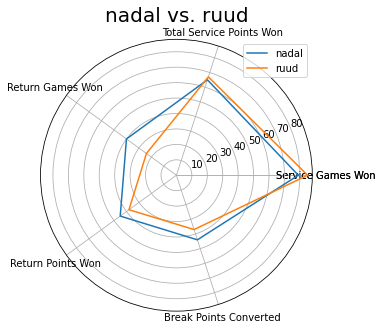

In [5]:
feats = ['Service Games Won','Total Service Points Won', 'Return Games Won', 'Return Points Won', 'Break Points Converted']
_sr = sr.copy()
for c in _sr.columns:
    _sr[c] = [int(str(x).replace('%','')) for x in _sr[c]]
    
p1 = _sr.transpose()[feats].iloc[0].values.tolist()
p2 = _sr.transpose()[feats].iloc[1].values.tolist()
p1 = [*p1, p1[0]]
p2 = [*p2, p2[0]]
feats = [*feats, feats[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(p1))

plt.figure(figsize=(8, 5))
plt.subplot(polar=True)
plt.plot(label_loc, p1, label=m.p1_lname)
plt.plot(label_loc, p2, label=m.p2_lname)
plt.title(f'{m.p1_lname} vs. {m.p2_lname}', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=feats)
plt.legend()
plt.show()

In [6]:
base_strs = ['_ytd pct', '_career pct']
p1_color_cols = [m.p1_lname + x for x in base_strs]
p2_color_cols = [m.p2_lname + x for x in base_strs]

In [7]:
x = m.build_win_loss_frame()

In [8]:
def highlight_col_labels(s):
    pass
x.style.background_gradient(subset = p1_color_cols+p2_color_cols, cmap='RdYlGn', axis=0)

,nadal_ytd pct,nadal_ytd win,nadal_ytd loss,nadal_career pct,nadal_career win,nadal_career loss,nadal_titles,ruud_ytd pct,ruud_ytd win,ruud_ytd loss,ruud_career pct,ruud_career win,ruud_career loss,ruud_titles
index,,,,,,,,,,,,,,
Overall,0.909000,30,3,0.833000,1058,212,92.000000,0.750000,30,10,0.651000,149,80,8.000000
Grand Slams,1.000000,14,0,0.882000,305,41,22.000000,0.857000,6,1,0.588000,20,14,0.000000
ATP Masters 1000,0.727000,8,3,0.825000,406,86,36.000000,0.667000,10,5,0.615000,32,20,0.000000
Tiebreaks,0.846000,11,2,0.613000,261,165,nan,0.647000,11,6,0.474000,37,41,nan
Versus Top 10,0.875000,7,1,0.649000,185,100,nan,0.333000,1,2,0.227000,5,17,nan
Finals,0.800000,4,1,0.708000,92,38,nan,0.500000,2,2,0.667000,8,4,nan
Deciding Set (3rd or 5th Set),0.778000,7,2,0.694000,179,79,nan,0.667000,6,3,0.684000,39,18,nan
5th Set Record,1.000000,3,0,0.658000,25,13,nan,1.000000,1,0,0.556000,5,4,nan
Clay,0.833000,10,2,0.913000,474,45,63.000000,0.778000,21,6,0.725000,95,36,7.000000


In [9]:
def highlight_wins(s):
    return ['background-color: green' if v == 'W' \
            else 'background-color: red' if v == 'L' \
            else '' for v in s]

p1, p2 = m.build_activity_frame()

In [15]:
print(m.p1_lname)
p1.style.background_gradient(subset = 'Rank', cmap='RdYlGn_r').apply(highlight_wins)

nadal


,Round,Rank,Opponent,W-L,Score,tournament
0,Finals,8.000000,Casper Ruud,W,63 63 60,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
1,Semi-Finals,3.000000,Alexander Zverev,W,768 66 (RET),"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
2,Quarter-Finals,1.000000,Novak Djokovic,W,62 46 62 764,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
3,Round of 16,9.000000,Felix Auger-Aliassime,W,36 63 62 36 63,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
4,Round of 32,29.000000,Botic van de Zandschulp,W,63 62 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
5,Round of 64,138.000000,Corentin Moutet,W,63 61 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
6,Round of 128,82.000000,Jordan Thompson,W,62 62 62,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
7,Round of 16,16.000000,Denis Shapovalov,L,61 57 26,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
8,Round of 32,27.000000,John Isner,W,63 61,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
9,Round of 64,nan,Bye,nan,nan,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"


In [16]:
print(m.p2_lname)
p2.style.background_gradient(subset = 'Rank', cmap='RdYlGn_r').apply(highlight_wins)

ruud


,Round,Rank,Opponent,W-L,Score,tournament
0,Finals,8.000000,Casper Ruud,W,63 63 60,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
1,Semi-Finals,3.000000,Alexander Zverev,W,768 66 (RET),"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
2,Quarter-Finals,1.000000,Novak Djokovic,W,62 46 62 764,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
3,Round of 16,9.000000,Felix Auger-Aliassime,W,36 63 62 36 63,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
4,Round of 32,29.000000,Botic van de Zandschulp,W,63 62 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
5,Round of 64,138.000000,Corentin Moutet,W,63 61 64,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
6,Round of 128,82.000000,Jordan Thompson,W,62 62 62,"Roland Garros Paris, France 2022.05.23 - 2022.06.05"
7,Round of 16,16.000000,Denis Shapovalov,L,61 57 26,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
8,Round of 32,27.000000,John Isner,W,63 61,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"
9,Round of 64,nan,Bye,nan,nan,"ATP Masters 1000 Rome Rome, Italy 2022.05.09 - 2022.05.15"


<h1 style="color:teal">predict</h1>

In [17]:
hms = HistoricalMatchStats(fname = 'atp_matches_2021.csv')

In [18]:
df = hms.player_match_rows()

/Users/michaelsands/code/tennis/vendors/tennisabstract/historical_match_stats.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df[c1].loc[_df.index.isin(randomlist)] = df[c1.replace('p1_', 'p2_')].loc[_df.index.isin(randomlist)]
/Users/michaelsands/code/tennis/vendors/tennisabstract/historical_match_stats.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df[c2].loc[_df.index.isin(randomlist)] = df[c2.replace('p2_', 'p1_')].loc[_df.index.isin(randomlist)]


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
match_num,1898.0,250.003688,63.785945,1.0,240.0,277.0,290.0,300.0
tourney_name,1898.0,55.964173,29.901063,0.0,46.0,65.0,78.0,93.0
p1_result,1898.0,0.500000,0.500132,0.0,0.0,0.5,1.0,1.0
p2_result,1898.0,0.500000,0.500132,0.0,0.0,0.5,1.0,1.0
p1_hand,1898.0,0.872497,0.336768,0.0,1.0,1.0,1.0,2.0
p1_rank,1898.0,59.231823,79.100705,1.0,22.0,47.0,80.0,2146.0
p1_ht,1898.0,187.635933,7.015963,170.0,183.0,188.0,193.0,211.0
p1_ace,1898.0,6.310327,5.589461,0.0,2.0,5.0,9.0,49.0
p1_df,1898.0,3.023182,2.463115,0.0,1.0,3.0,4.0,26.0
p1_svpt,1898.0,80.834036,28.781846,6.0,60.0,75.0,98.0,220.0


In [20]:
df = df[[
'p1_result','p2_result',
'p1_hand', 'p1_rank','p1_ht', 'p1_ace','p1_svpt', 'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms', 'p1_bpSaved', 'p1_bpFaced', 
'p2_hand','p2_rank', 'p2_ht', 'p2_ace', 'p2_svpt', 'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms', 'p2_bpSaved', 'p2_bpFaced'
]]

In [21]:
learnloop.learn(df)

*** LogisticRegression(random_state=100) ***
Accuracy: 0.9456140350877194
Precision: 0.9359430604982206
Recall: 0.9528985507246377
predit: [1]

*** SVC(kernel='linear') ***


/Users/michaelsands/venvs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9421052631578948
Precision: 0.9293286219081273
Recall: 0.9528985507246377
predit: [1]

*** KNeighborsClassifier(n_neighbors=3) ***
Accuracy: 0.6421052631578947
Precision: 0.6267605633802817
Recall: 0.644927536231884
predit: [0]

*** DecisionTreeClassifier() ***
Accuracy: 0.7912280701754386
Precision: 0.79182156133829
Recall: 0.7717391304347826
predit: [0]

actuals:
     p1_hand  p1_rank  p1_ht  p1_ace  p1_svpt  p1_1stIn  ...  p2_1stIn  p2_1stWon  p2_2ndWon  p2_SvGms  p2_bpSaved  p2_bpFaced
430      1.0     80.0  180.0     0.0     91.0      59.0  ...      41.0       29.0       24.0      13.0         7.0        11.0

[1 rows x 22 columns]
p1_result    0
p2_result    1
Name: 430, dtype: int64


In [22]:
# TODO: call match.build_prediction_frame()

<h1 style="color:teal">pobabilities</h1>

In [23]:
prob = Probabilities()
ra = prob.expected_rank(atp_rank=1)
rb = prob.expected_rank(atp_rank=100)
ra, rb

(8.0, 3.394829814011908)

In [24]:
pa_match = prob.prob_win_at_match_start(Ra=ra, Rb=rb)
pa_match

0.5978476967222589

In [25]:
pa_game  = prob.prob_win_game(Pa=pa_match) 
pa_game

0.7312222744755827

In [26]:
point_probs = prob.win_point(ai=0.5, bi=0.5, ci=0.5, aav=0.5, di=0.5, ei=0.5)
point_probs

(0.5, 0.5)

0.34760971265398666
[4]


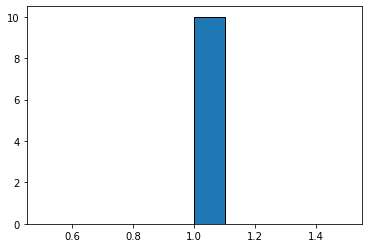

In [29]:
prob.prob_of_prop_occurance(mu=.7, k = 1, how=None)